In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf 
import tensorflow_hub as hub 
import PIL.Image as image 

In [2]:
classifier_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2"

In [3]:
labelPath = tf.keras.utils.get_file('ImageNetLabels.txt' ,'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')

In [4]:
imnet_labels = np.array(open(labelPath).read().splitlines())

In [5]:
imShape = (224,224)
C = tf.keras.Sequential([
          hub.KerasLayer(classifier_url, input_shape =imShape+(3,))
])

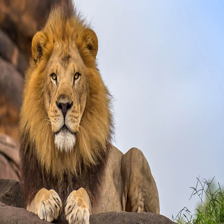

In [6]:
I = image.open(r'C:\Users\user\Desktop\yoo.jpg').resize(imShape)
I

In [7]:
I = np.array(I)/255.0
I.shape

(224, 224, 3)

In [8]:
r = C.predict(I[np.newaxis , ...])
r.shape 
#has 1000 classes and one extra if not in those 1000 categories .

(1, 1001)

In [9]:
pc = np.argmax(r[0],axis =-1)
pc

292

Text(0.5, 1.0, 'lion')

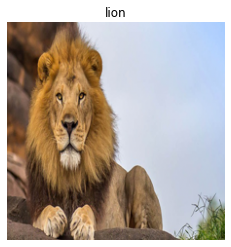

In [10]:
plt.imshow(I)
plt.axis('off')
pcn = imnet_labels[pc]
plt.title(pcn)

In [11]:
data_root = tf.keras.utils.get_file('flower_photos','https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',untar =True)

In [12]:
ig = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
imdata = ig.flow_from_directory(str(data_root),target_size =imShape)


Found 3670 images belonging to 5 classes.


In [13]:
for imB, lbB in imdata:
    print(imB.shape)
    print(lbB.shape)
    break;

(32, 224, 224, 3)
(32, 5)


In [14]:
rB = C.predict(imB)
rB.shape

(32, 1001)

In [15]:
pcn = imnet_labels[np.argmax(rB, axis =-1)]
pcn

array(['daisy', 'picket fence', 'daisy', 'hip', 'bee', 'daisy', 'daisy',
       'spider web', 'snail', 'picket fence', 'daisy', 'macaw',
       'picket fence', 'conch', 'picket fence', 'pot', 'daisy',
       'mushroom', 'daisy', 'sulphur butterfly', 'picket fence', 'daisy',
       'ear', "jack-o'-lantern", 'honeycomb', 'daisy', 'maze', 'mushroom',
       'pot', 'sea urchin', 'daisy', 'pinwheel'], dtype='<U30')

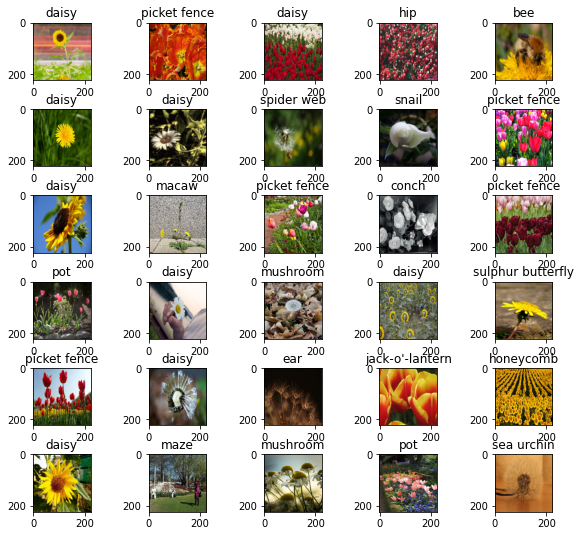

In [16]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for i in range (30):
    plt.subplot(6,5,i+1)
    plt.imshow(imB[i])
    plt.title(pcn[i])
    

# Transfer_learning 

In [17]:
headLessModel_url = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/2' # has only feature extractor no fully connected layers 

In [18]:
headLessModel = hub.KerasLayer(headLessModel_url , input_shape= imShape +(3,))

In [19]:
fImB = headLessModel(imB)
fImB.shape

TensorShape([32, 1280])

In [20]:
headLessModel.trainable = False 

In [21]:
#lets build new model 
newModel = tf.keras.Sequential([
    headLessModel,
    tf.keras.layers.Dense(imdata.num_classes, activation = 'softmax')
    
])

In [22]:
newModel.compile(optimizer = 'adam',loss = tf.keras.losses.CategoricalCrossentropy(from_logits =True) , metrics =['accuracy'])

In [23]:
newModel.fit(imdata,epochs = 5)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 115 steps
Epoch 1/5
115/115 [==============================] - 129s 1s/step - loss: 1.2150 - accuracy: 0.7346
Epoch 2/5
115/115 [==============================] - 128s 1s/step - loss: 1.0565 - accuracy: 0.8823
Epoch 3/5
115/115 [==============================] - 113s 985ms/step - loss: 1.0266 - accuracy: 0.9057
Epoch 4/5
115/115 [==============================] - 104s 908ms/step - loss: 1.0089 - accuracy: 0.9204
Epoch 5/5
115/115 [==============================] - 109s 947ms/step - loss: 0.9958 - accuracy: 0.9308


In [24]:
cn  = np.array(['Daisy','Dandelion','Roses','Sunflower','Tulips'])

In [26]:
p = newModel.predict(imB)
p_ids =np.argmax(p,axis=-1)
pcn = cn[p_ids]


In [27]:
L_ids = np.argmax(lbB , axis =-1)


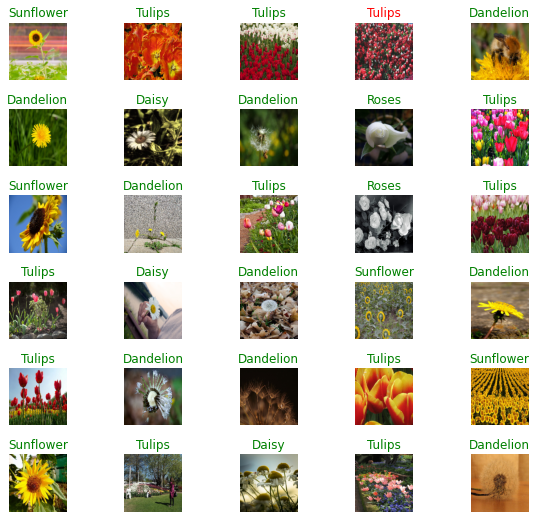

In [31]:
plt.figure(figsize = (10,9))
plt.subplots_adjust(hspace = 0.5)
for i in range(30):
    plt.subplot(6,5,i+1)
    plt.imshow(imB[i])
    color  = 'green' if p_ids[i] == L_ids[i] else 'red'
    plt.title(pcn[i].title() , color = color)
    plt.axis('off')

In [32]:
# only 1 wrong answer in 36 answers , this is how efficient transfer learning is even on small amounts of data